# Exploring the Land Sealing Application Dataset
This project executes a pipeline which yields a complex dataset regarding land sealing applications across Germany. 
This notebook is intended to help users understand how to extract the final forms of these datasets and apply analysis.

In [1]:
import pandas as pd ## a common datatable manipulation library
import geopandas as gpd ## an extension of pandas fo the geojson filetype
import os ## used for loading and saving files
import sys ## Used for handling imports
import matplotlib.pyplot as plt ## visualizations
sys.path.insert(0, './src') ## helps with imports in our file structure
from explorers.explorer import * ## functions that yield datasets

## Introducing the datasets
The explorer module provides functions that yield pre-processed and cleaned datasets for analysis. The data is generated from a complex pipeline described in the official documentation. The explorer notebook fields clean datasets and an easy way to get started with analysis. 

### Land Parcels
Each row is a link to a specific land parcel's document. The document text is found in the document_text table.
This also provides data specific to land parcels, such as the geometry of its boarders, its name and ID. Note that we have only scraped data for the state of NRW. 

In [2]:
lp = land_parcels()
lp.to_csv('data/clean/land_parcels.csv')
lp.head(5)

,Land Parcel ID,planid,levelplan,name,kommune,gkz,nr,besch,aend,aendert,...,begruendurl,umweltberurl,erklaerungurl,shape_Length,shape_Area,Region Plan ID,regional_plan_name,ART,LND,geometry
0,84060,DE_05382060_Siegburg_BP93/1,infra-local,"Im Klausgarten, Braschosser Straße, Am Kreuztor",Siegburg,05382060,93/1,NaN,NaN,NaN,...,NaN,NaN,NaN,868.647801,3.196032e+04,5022,Region Bonn/Rhein-Sieg,Teilabschnitt,5,"POLYGON ((7.28543 50.82280, 7.28728 50.82179, ..."
1,559438,DE_05382036_02_32,infra-local,32. Änderung des Bebauungsplanes Nr. 2 „Much-K...,Much,05382036,0,NaN,32. Änderung,NaN,...,https://www.much.de/zukunft/bauleitplanungen,https://www.much.de/zukunft/bauleitplanungen,NaN,473.229327,4.467916e+03,5022,Region Bonn/Rhein-Sieg,Teilabschnitt,5,"POLYGON ((7.39385 50.90281, 7.39416 50.90240, ..."
2,2257588,DE_05314000_00,local,Flächennutzungsplan der Bundesstadt Bonn,Bonn,05314000,00,,,,...,NaN,NaN,NaN,69372.039264,1.410146e+08,5022,Region Bonn/Rhein-Sieg,Teilabschnitt,5,"POLYGON ((7.12896 50.77292, 7.12899 50.77292, ..."
3,2367967,DE_05378028_9aenderungI_Ur,local,9. Änderung §34_Urschrift,Rösrath,05378028,9aenderungI_Ur,Breide und Durbusch,Urschrift,,...,http://www.roesrath.de/34-9.-aenderung-breide-...,,,739.659941,7.348491e+03,5022,Region Bonn/Rhein-Sieg,Teilabschnitt,5,"MULTIPOLYGON (((7.23255 50.91855, 7.23242 50.9..."
4,2367975,DE_05378028_1aenderungundUrschriftI_Ur,local,1. Änderung und Urschrift §34_Urschrift,Rösrath,05378028,1aenderungundUrschriftI_Ur,,Urschrift,,...,http://www.roesrath.de/34-urfassung-und-1.-aen...,,,56630.267941,6.082747e+06,5022,Region Bonn/Rhein-Sieg,Teilabschnitt,5,"MULTIPOLYGON (((7.19091 50.88535, 7.19112 50.8..."


### Document Texts
This is a very large file containing the text blobs of every document extracted from the land parcel dataset's scanurl column. 
Because it is so large we retrieve on a small amount of it here. the full data can be found in `data\document_texts`

In [3]:
## this datable is very large with many text blobs, so for 
## efficiency we retrieve on the first 5 rows. 
dt = document_texts(sample_n=5) 
## dataset found in data\document_texts
dt

,filename,document_id,content,Land Parcel ID,land_parcel_name,land_parcel_scanurl
0,116995_0.pdf,116995_0,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,116995,Lohhäuser Feld im Stadtteil Klein-Erkenschwick,https://www.o-sp.de/download/oer-erkenschwick/...
1,116995_10.pdf,116995_10,NaN,116995,Lohhäuser Feld im Stadtteil Klein-Erkenschwick,https://www.o-sp.de/download/oer-erkenschwick/...
2,116995_2.pdf,116995_2,NaN,116995,Lohhäuser Feld im Stadtteil Klein-Erkenschwick,https://www.o-sp.de/download/oer-erkenschwick/...
3,116995_4.pdf,116995_4,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,116995,Lohhäuser Feld im Stadtteil Klein-Erkenschwick,https://www.o-sp.de/download/oer-erkenschwick/...
4,116995_6.pdf,116995_6,NaN,116995,Lohhäuser Feld im Stadtteil Klein-Erkenschwick,https://www.o-sp.de/download/oer-erkenschwick/...


### Reional Plans
We manually compiled a set of regional plan documents for NRW and extracted the text and relevant data from these files. Each row is a regional plan. One region may have multiple regional plan documents. 

In [4]:
rp = regional_plans()
rp.to_csv('data/clean/regional_plans.csv')
rp.head(5)

,filename,chapter,section,section_type,year,Region Plan ID,Name
0,arnsberg-2001-bochum_hagen,durchführungsverordnung zum landesplanungsgese...,\nentwicklungschancen und regionalplanerische ...,start,2001.0,5055.0,Oberbereiche Bochum/Hagen
1,arnsberg-2001-bochum_hagen,demographische und wirtschaftliche entwicklung,erläuterungen\nbegründet und näher beschrieben...,explanation,2001.0,5055.0,Oberbereiche Bochum/Hagen
2,arnsberg-2001-bochum_hagen,demographische und wirtschaftliche entwicklung,ziel 1\n(1) freiraum darf nach den vorgaben de...,target,2001.0,5055.0,Oberbereiche Bochum/Hagen
3,arnsberg-2001-bochum_hagen,demographische und wirtschaftliche entwicklung,erläuterung:\nder im gebietsentwicklungsplan d...,explanation,2001.0,5055.0,Oberbereiche Bochum/Hagen
4,arnsberg-2001-bochum_hagen,demographische und wirtschaftliche entwicklung,ziel 2\n(1) die siedlungsstruktur ist vorrangi...,target,2001.0,5055.0,Oberbereiche Bochum/Hagen


### Keyword searches

We support two methods of keyword searching:
* Exact search: in which we determine a True/False result if a given word is present or not. 
* Fuzzy search: In which we return the result's before/after wording and match on the word given some amount of spelling differences (ie: compound words or mis-readings)

#### Exact keyword search results

In [5]:
kw_exact = exact_keyword()
kw_exact.to_csv('data/clean/exact_keyword.csv')
kw_exact.head(5)

,filename,baunvo-1,baunvo-2,baunvo-3,baunvo-4,baunvo-4a,baunvo-5,baunvo-5a,baunvo-6,baunvo-6a,...,baunvo-17,baunvo-18,baunvo-19,baunvo-20,baunvo-21,baunvo-21a,13b,hq100,hqhäufig,hqextrem
0,116995_0.pdf,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,116995_10.pdf,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,116995_2.pdf,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,116995_4.pdf,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,116995_6.pdf,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Fuzzy keyword search results

In [6]:
kw_fuzzy = fuzzy_keyword()
kw_fuzzy.to_csv('data/clean/fuzzy_keyword.csv')
kw_fuzzy.sample(5,random_state=42)

,Document ID,firsthöhe,geschossflächenzahl,grundflächenzahl,höhe baulicher anlagen,maximale gebäudehöhe,minimale gebäudehöhe,traufhöhe
9560,2410889_3.pdf,NaN,NaN,"und umfang des vorhabens, bedarf an grund und ...",NaN,NaN,NaN,NaN
9567,2411013_2.pdf,NaN,NaN,wohnnutzung und ggfl. wohnfolgeeinrichtungen v...,NaN,NaN,NaN,NaN
6224,2389726_1.pdf,NaN,NaN,und an moderne bedürfnisse angepasst werden (z...,NaN,NaN,NaN,NaN
7330,2399066_1.pdf,NaN,NaN,nerisch folgendes fest:  allgemeines wohngebi...,NaN,NaN,NaN,NaN
17950,2408760_5.pdf,NaN,NaN,NaN,NaN,NaN,baulichen nutzung durch die festsetzung einer ...,NaN


### Knowledge agent
For a subsample of fuzzy keyword results, we run the text through ChatGPT to ask it to extract certain details. This table is the result of that experiment. 

In [7]:
ka = knowledge_agent()
ka.to_csv('data/clean/knowledge_agent.csv')
ka.head(5)

,id,gfz_input,gfz_agent_response,gfz_extracted_value,validation
10,2220452_13.pdf,maß der baulichen nutzung (§ 9 abs. 1 nr. 1 ba...,gfz: None,NaN,True
11,2220495_15.pdf,nr. 9 „am nordkanal“ in straelen herongen. die...,"gfz: 0,4 / 0,5",0.4,True
12,2220495_17.pdf,nr. 9 „am nordkanal“ in straelen herongen. die...,"gfz: 0,4 / 0,5",0.4,True
13,2220510_0.pdf,2. maß der baulichen nutzung (§ 9 abs. 1 nr. 1...,None,NaN,True
14,2220511_2.pdf,des verfahrens zur aufstellung dieses bebauung...,"gfz: 0,8",0.8,True


## Missing Data Analysis at the Land Parcel Level

In [8]:
document_texts_df = document_texts(usecols=['land_parcel_id'])
land_parcels_gdf=land_parcels()

In [9]:
land_parcels_gdf['Missing']=land_parcels_gdf[
    'Land Parcel ID'
    ].apply(
        lambda x: x in document_texts_df['Land Parcel ID'].values 
        )

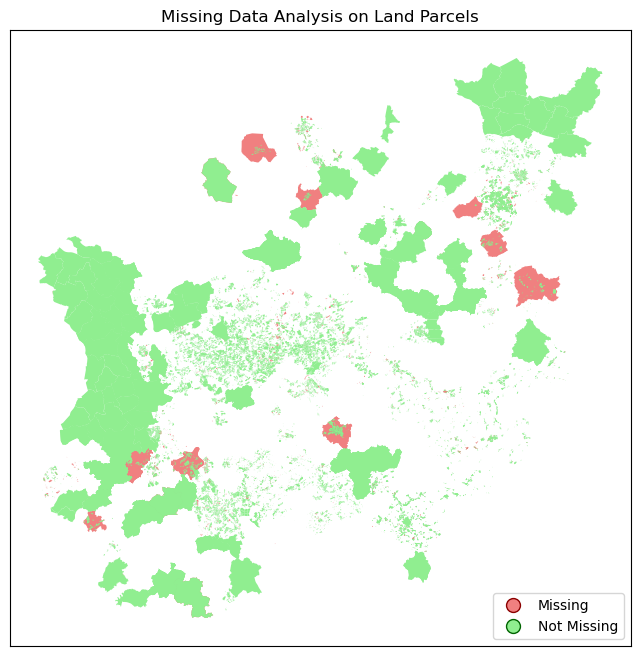

In [10]:
missing_true_gdf = land_parcels_gdf[land_parcels_gdf['Missing'] 
                                    == True]
missing_false_gdf = land_parcels_gdf[land_parcels_gdf['Missing'] == 
                                     False]
fig, ax = plt.subplots(figsize=(12, 8))

missing_true_gdf.plot(ax=ax, color='lightcoral', label='Missing')
missing_false_gdf.plot(ax=ax, color='lightgreen', label='Not Missing')

legend_labels = ['Missing', 'Not Missing']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor='lightcoral', 
                             markersize=10, 
                             markeredgecolor='darkred'),
                  plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor='lightgreen', 
                             markersize=10, 
                             markeredgecolor='darkgreen')]

ax.legend(legend_handles, legend_labels, loc='lower right')

ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Missing Data Analysis on Land Parcels')
plt.show()

## Flooding Risk Analysis at the Land Parcel Level
Keywords in Question: 
1. hq100
2. hqhäufig
3. hqextrem
4. betroffen_von_überschwemmung

In [11]:
exact_keyword_df = exact_keyword()
combined_df = document_texts_df.merge(exact_keyword_df, on='filename')
joined_df = land_parcels_gdf.merge(combined_df, on='Land Parcel ID', 
                                   how='outer')
joined_df 

,Land Parcel ID,planid,levelplan,name,kommune,gkz,nr,besch,aend,aendert,...,baunvo-17,baunvo-18,baunvo-19,baunvo-20,baunvo-21,baunvo-21a,13b,hq100,hqhäufig,hqextrem
0,84060,DE_05382060_Siegburg_BP93/1,infra-local,"Im Klausgarten, Braschosser Straße, Am Kreuztor",Siegburg,05382060,93/1,NaN,NaN,NaN,...,True,True,True,True,True,True,False,False,False,False
1,84060,DE_05382060_Siegburg_BP93/1,infra-local,"Im Klausgarten, Braschosser Straße, Am Kreuztor",Siegburg,05382060,93/1,NaN,NaN,NaN,...,True,True,True,True,True,True,False,False,False,False
2,559438,DE_05382036_02_32,infra-local,32. Änderung des Bebauungsplanes Nr. 2 „Much-K...,Much,05382036,0,NaN,32. Änderung,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2257588,DE_05314000_00,local,Flächennutzungsplan der Bundesstadt Bonn,Bonn,05314000,00,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2367967,DE_05378028_9aenderungI_Ur,local,9. Änderung §34_Urschrift,Rösrath,05378028,9aenderungI_Ur,Breide und Durbusch,Urschrift,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73062,2420772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
73063,2420774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,False,False,False,False
73064,2420776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,False,False,False,False
73065,2420778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,False,False,False,False


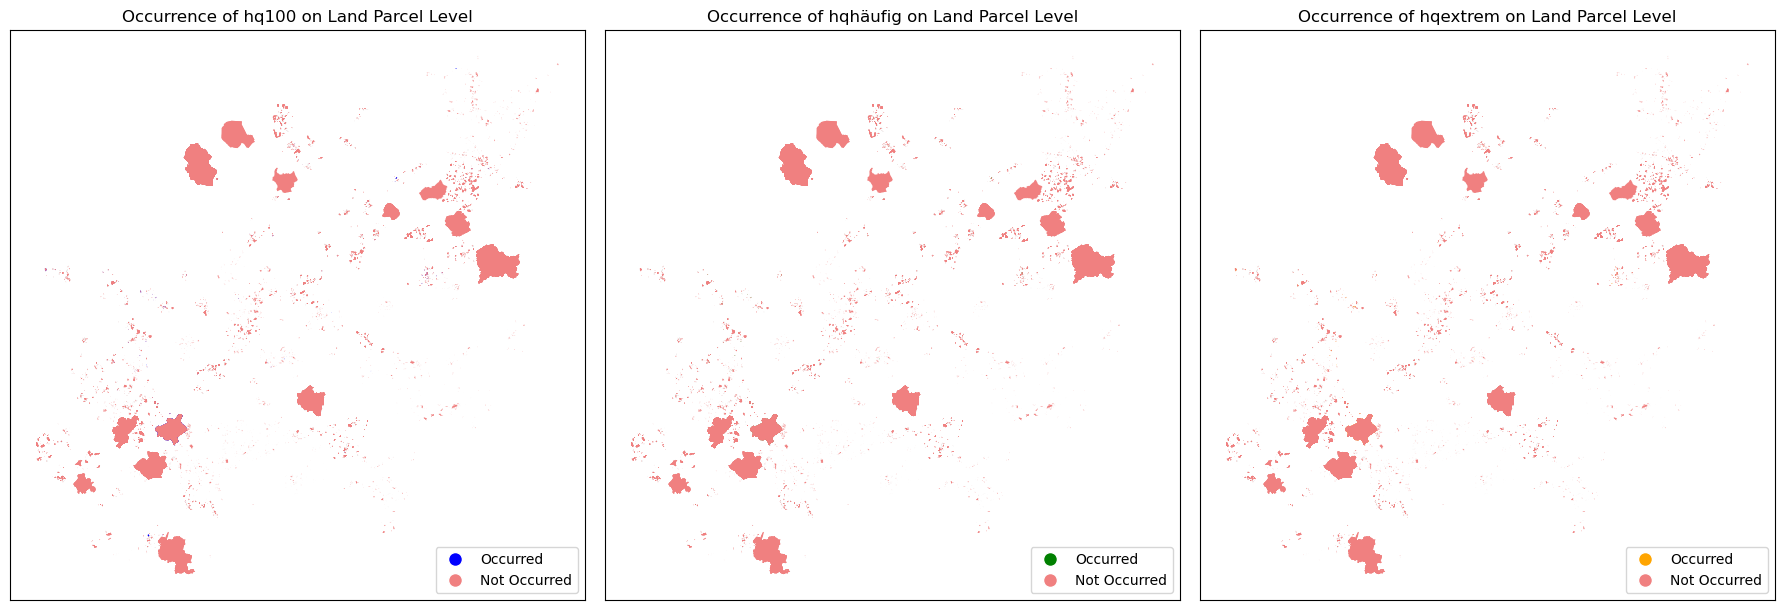

In [12]:
columns_to_map = ['hq100', 'hqhäufig', 'hqextrem']
colors = ['blue', 'green', 'orange']
legend_labels = ['hq100', 'hqhäufig', 'hqextrem']
fig, axes = plt.subplots(1, len(columns_to_map), figsize=(18, 6))

for i, column in enumerate(columns_to_map):
    ax = axes[i]
    true_color = colors[i]
    false_color = 'lightcoral' 
    
    joined_df[joined_df[column] == True].plot(ax=ax, color=true_color, 
                                              label='True (Occurred)')
    joined_df[joined_df[column] == False].plot(ax=ax, 
                                               color=false_color, 
                                               label='False (Not Occurred)')
    
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', 
                                 markerfacecolor=true_color, 
                                 markersize=10),
                      plt.Line2D([0], [0], marker='o', color='w', 
                                 markerfacecolor=false_color, 
                                 markersize=10)]
    
    ax.legend(legend_handles, ['Occurred', 'Not Occurred'], 
              loc='lower right')
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(
        f'Occurrence of {legend_labels[i]} on Land Parcel Level')

plt.tight_layout()
plt.show()

In [13]:
hochwasser_df = pd.read_csv("data/hochwasser_keywords.csv", index_col=0)
hochwasser_merged_df= joined_df.merge(hochwasser_df, on='filename', 
                                   how='outer')
hochwasser_merged_df

,Land Parcel ID,planid,levelplan,name,kommune,gkz,nr,besch,aend,aendert,...,baunvo-19,baunvo-20,baunvo-21,baunvo-21a,13b,hq100,hqhäufig,hqextrem,actual_keyword,category
0,84060,DE_05382060_Siegburg_BP93/1,infra-local,"Im Klausgarten, Braschosser Straße, Am Kreuztor",Siegburg,05382060,93/1,NaN,NaN,NaN,...,True,True,True,True,False,False,False,False,NaN,NaN
1,84060,DE_05382060_Siegburg_BP93/1,infra-local,"Im Klausgarten, Braschosser Straße, Am Kreuztor",Siegburg,05382060,93/1,NaN,NaN,NaN,...,True,True,True,True,False,False,False,False,innenentwicklung,innenentwicklung
2,559438,DE_05382036_02_32,infra-local,32. Änderung des Bebauungsplanes Nr. 2 „Much-K...,Much,05382036,0,NaN,32. Änderung,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2257588,DE_05314000_00,local,Flächennutzungsplan der Bundesstadt Bonn,Bonn,05314000,00,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2367967,DE_05378028_9aenderungI_Ur,local,9. Änderung §34_Urschrift,Rösrath,05378028,9aenderungI_Ur,Breide und Durbusch,Urschrift,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78694,2420772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,NaN
78695,2420774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,False,False,False,False,hqextrem,hqextrem
78696,2420776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,False,False,False,False,niederschlagswasser,betroffen_von_überschwemmung
78697,2420778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,False,False,False,False,NaN,NaN


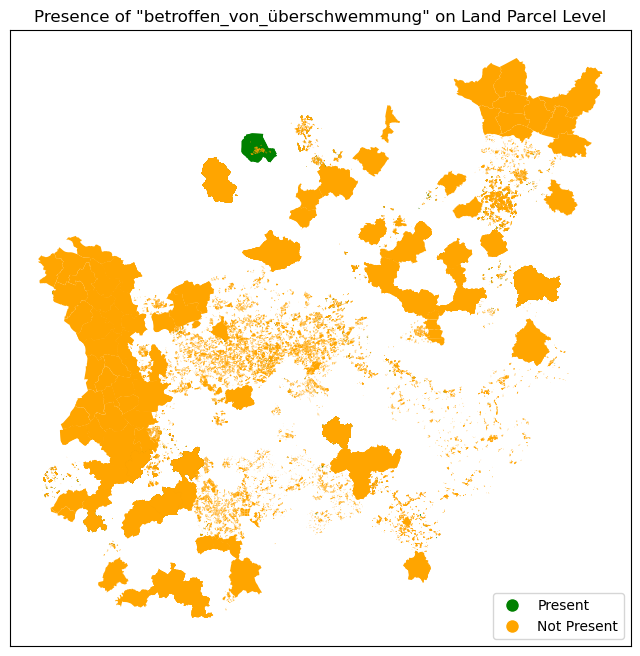

In [14]:
hochwasser_merged_df['betroffen_von_überschwemmung_presence'] = \
hochwasser_merged_df['category'].str.contains(
    'betroffen_von_überschwemmung', case=False, na=False)


geo_df_category_presence = hochwasser_merged_df[
    ['Land Parcel ID', 'betroffen_von_überschwemmung_presence', 
     'geometry']]


fig, ax = plt.subplots(figsize=(12, 8))

geo_df_category_presence[
    geo_df_category_presence['betroffen_von_überschwemmung_presence']
].plot(
    ax=ax,
    color='green',
    label='Present'
)
geo_df_category_presence[
    ~geo_df_category_presence['betroffen_von_überschwemmung_presence']
].plot(
    ax=ax,
    color='orange',
    label='Not Present'
)

legend_labels = ['Present', 'Not Present']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor='green', markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor='orange', markersize=10)]


ax.legend(legend_handles, legend_labels, loc='lower right')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(
    'Presence of "betroffen_von_überschwemmung" on Land Parcel Level')


plt.show()